In [ ]:

pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=92f2337084fcc6f659d574ace771ea1e953e4b46832ea11c30b8c0c435d1cb4e
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
!pip install -U som-learn

ERROR: Could not find a version that satisfies the requirement som-learn (from versions: none)
ERROR: No matching distribution found for som-learn


In [ ]:
!pip install skrebate


  Preparing metadata (setup.py) ... done
  Created wheel for skrebate: filename=skrebate-0.62-py3-none-any.whl size=29253 sha256=3c93b4de4cbf4653c7ba932c4386d65a708187300f04c481496d2493f93c8255
  Stored in directory: /root/.cache/pip/wheels/8a/d2/67/8368fca718041057b33d6448ca526aaf1ce2e404c94b901e41
Successfully built skrebate


In [ ]:
pip install lofo-importance


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


# !pip install scikit-learn matplotlib seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.feature_selection import (
    mutual_info_classif,  # Information Gain
    chi2,                    # Chi-square Test
    f_classif,               # ANOVA (F-test)
    SelectKBest,             # Select top k features
    VarianceThreshold        # Variance Threshold
)
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from lime import lime_tabular

from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
import numba as nb
from matplotlib import cm
import seaborn as sns
%matplotlib inline
from scipy import stats
import matplotlib.colors as mcolors
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
import sklearn.metrics as skm
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from scipy.spatial.distance import cdist
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
from numpy import loadtxt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import GridSearchCV
from collections import Counter
import math
from skrebate import ReliefF
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier


In [ ]:
import shap
from lime import lime_tabular

In [ ]:
pip install shap lime


In [ ]:
!pip install mlxtend


# II. Data Pre-Processing

## (I) Data spliting and scaling

- **Spliting** dataframe for training, testing and validation
- **Scaling** the predictor to normalize the impact factor, since each predictor has a different degree of impact on the outcome
    \

## (II) Data balancing

### 2D: PCA & t-SNE

In [ ]:
def dim2(df, size, markersize):

  x = df.iloc[:,:-1].to_numpy()
  y = df.iloc[:,-1].to_numpy()

  ss = StandardScaler()
  ss_model = ss.fit(x)
  x_scaled = ss_model.transform(x)

# PCA
  pca = PCA(n_components=2)

  x_pca = pca.fit_transform(x_scaled)

  np_pca = np.hstack((x_pca, y.reshape(len(y),1)))

  column_pca = ['pc_0', 'pc_1', 'class']

  df_pca = pd.DataFrame(data = np_pca, columns = column_pca)


  df_0_pca = df_pca[(df_pca.iloc[:,-1] == 0)]
  df_1_pca = df_pca[(df_pca.iloc[:,-1] == 1)]
  x_0_pca = df_0_pca.iloc[:,:-1].to_numpy()
  x_1_pca = df_1_pca.iloc[:,:-1].to_numpy()

# t-SNE

  tsne = TSNE(n_components=2)

  x_tsne = tsne.fit_transform(x_scaled)

  np_tsne = np.hstack((x_tsne, y.reshape(len(y),1)))

  column_tsne = ['dim_0', 'dim_1', 'class']

  df_tsne = pd.DataFrame(data = np_tsne, columns = column_tsne)


  df_0_tsne = df_tsne[(df_tsne.iloc[:,-1] == 0)]
  df_1_tsne = df_tsne[(df_tsne.iloc[:,-1] == 1)]
  x_0_tsne = df_0_tsne.iloc[:,:-1].to_numpy()
  x_1_tsne = df_1_tsne.iloc[:,:-1].to_numpy()


#  plot

  fig = plt.figure(figsize = (16, 5))

  ax = plt.subplot(121)

  class_0_pca = ax.scatter(x_0_pca[:,0], x_0_pca[:,1], c='blue', s=size, alpha=0.3, label='Negative Cases')
  class_1_pca = ax.scatter(x_1_pca[:,0], x_1_pca[:,1], c='orange', s=size, alpha=0.3, label='Positive Cases')

  ax.legend(handles=[class_0_pca, class_1_pca] , markerscale=markersize, loc = 'best',
            frameon = True, facecolor = 'white', edgecolor = 'black')
  plt.title('PCA', size = 12)

  ax2 = plt.subplot(122)

  class_0_tsne = ax2.scatter(x_0_tsne[:,0], x_0_tsne[:,1], c='blue', s=size, alpha=0.3, label='Negative Cases')
  class_1_tsne = ax2.scatter(x_1_tsne[:,0], x_1_tsne[:,1], c='orange', s=size, alpha=0.3, label='Positive Cases')

  ax2.legend(handles=[class_0_tsne, class_1_tsne] , markerscale=markersize, loc = 'best',
            frameon = True, facecolor = 'white', edgecolor = 'black')
  plt.title('t-SNE', size = 12)


  plt.show()

### 2D: PCA only:

This served as a helper function for visualize the outcome of each classifier.

In [ ]:
def pca_plot(test_x_scaled, test_y, test_y_pred, size, markersize):

  pca = PCA(n_components=2)

  x_pca = pca.fit_transform(test_x_scaled)

  true_np = np.hstack((x_pca, test_y.reshape(len(test_y),1)))

  pred_np = np.hstack((x_pca, test_y_pred.reshape(len(test_y_pred),1)))

  column_true = ['pc_0', 'pc_1', 'true']

  column_pred = ['pc_0', 'pc_1', 'pred']

  true_df = pd.DataFrame(data = true_np, columns = column_true)

  pred_df = pd.DataFrame(data = pred_np, columns = column_pred)

  true_df_0 = true_df[(true_df.iloc[:,-1] == 0)]
  true_df_1 = true_df[(true_df.iloc[:,-1] == 1)]
  true_x_0 = true_df_0.iloc[:,:-1].to_numpy()
  true_x_1 = true_df_1.iloc[:,:-1].to_numpy()

  pred_df_0 = pred_df[(pred_df.iloc[:,-1] == 0)]
  pred_df_1 = pred_df[(pred_df.iloc[:,-1] == 1)]
  pred_x_0 = pred_df_0.iloc[:,:-1].to_numpy()
  pred_x_1 = pred_df_1.iloc[:,:-1].to_numpy()

  join_df = true_df.join(pred_df["pred"])

  correct_df = join_df[(join_df.true == join_df.pred)]

  wrong_df = join_df[(join_df.true != join_df.pred)]

  correct_df_0 = correct_df[(correct_df.iloc[:,-2] == 0)]
  correct_df_1 = correct_df[(correct_df.iloc[:,-2] == 1)]
  correct_x_0 = correct_df_0.iloc[:,:-2].to_numpy()
  correct_x_1 = correct_df_1.iloc[:,:-2].to_numpy()

  fn_df = wrong_df[(wrong_df.iloc[:,-1] == 0)]
  fp_df = wrong_df[(wrong_df.iloc[:,-1] == 1)]
  fn_x = fn_df.iloc[:,:-2].to_numpy()
  fp_x = fp_df.iloc[:,:-2].to_numpy()



# plot


  fig = plt.figure(figsize = (24, 5))

  ax1 = plt.subplot(131)


  true_class_0 = ax1.scatter(true_x_0[:,0], true_x_0[:,1], c='blue', s=size, alpha=0.3, label='Negative Cases')
  true_class_1 = ax1.scatter(true_x_1[:,0], true_x_1[:,1], c='orange', s=size, alpha=0.3, label='Positive Cases')

  ax1.legend(handles=[true_class_0, true_class_1] , markerscale=markersize, loc = 'best',
            frameon = True, facecolor = 'white', edgecolor = 'black')
  plt.title('Ground Truth of Test Data', size = 12)

  ax2 = plt.subplot(132)


  pred_class_0 = ax2.scatter(pred_x_0[:,0], pred_x_0[:,1], c='blue', s=size, alpha=0.3, label='Negative Cases')
  pred_class_1 = ax2.scatter(pred_x_1[:,0], pred_x_1[:,1], c='orange', s=size, alpha=0.3, label='Positive Cases')

  ax2.legend(handles=[pred_class_0, pred_class_1] , markerscale=markersize, loc = 'best',
            frameon = True, facecolor = 'white', edgecolor = 'black')
  plt.title('Prediction', size = 12)


  ax3 = plt.subplot(133)

  correct_class_0 = ax3.scatter(correct_x_0[:,0], correct_x_0[:,1], c='blue', s=size, alpha=0.3, label='True Negative')
  correct_class_1 = ax3.scatter(correct_x_1[:,0], correct_x_1[:,1], c='orange', s=size, alpha=0.3, label='True Positive')
  fn_class = ax3.scatter(fn_x[:,0], fn_x[:,1], c='green', s=size, alpha=0.3, label='False Negative')
  fp_class = ax3.scatter(fp_x[:,0], fp_x[:,1], c='red', s=size, alpha=0.3, label='False Positive')
  ax3.legend(handles=[correct_class_0, correct_class_1, fn_class, fp_class] , markerscale=markersize, loc = 'best',
            frameon = True, facecolor = 'white', edgecolor = 'black')

  plt.title('Comparison', size = 12)











### 3D: PCA

In [ ]:
def dim3(df, size, markersize):
  x = df.iloc[:,:-1].to_numpy()
  y = df.iloc[:,-1].to_numpy()

  ss = StandardScaler()
  ss_model = ss.fit(x)
  x_scaled = ss_model.transform(x)

  pca_1 = PCA(n_components = 3).fit(x_scaled)

  Xt = pca_1.transform(x_scaled)

  new_np = np.hstack((Xt, y.reshape(len(y),1)))

  column_values = ['pc_0', 'pc_1', 'pc_2', 'class']

  new_df = pd.DataFrame(data = new_np, columns = column_values)


  df_0 = new_df[(new_df.iloc[:,-1] == 0)]
  df_1 = new_df[(new_df.iloc[:,-1] == 1)]
  x_0 = df_0.iloc[:,:-1].to_numpy()
  y_0 = df_0.iloc[:,-1].to_numpy()
  x_1 = df_1.iloc[:,:-1].to_numpy()
  y_1 = df_1.iloc[:,-1].to_numpy()


  fig = plt.figure(figsize = (16, 5))

  ax = plt.subplot(121, projection ="3d")
  class_0 = ax.scatter3D(x_0[:,0], x_0[:,1], x_0[:,2], c='blue', s=size, alpha=0.3, label='Negative Cases')
  class_1 = ax.scatter3D(x_1[:,0], x_1[:,1], x_1[:,2], c='orange', s=size, alpha=0.3, label='Positive Cases')
  ax.legend(handles=[class_0, class_1] , markerscale=markersize, loc = 'best',
            frameon = True, facecolor = 'white', edgecolor = 'black')


  ax_2 = plt.subplot(122, projection ="3d")
  class_0_2 = ax_2.scatter3D(x_0[:,1], x_0[:,0], x_0[:,2], c='blue', s=size, alpha=0.3, label='Negative Cases')
  class_1_2 = ax_2.scatter3D(x_1[:,1], x_1[:,0], x_1[:,2], c='orange', s=size, alpha=0.3, label='Positive Cases')
  ax_2.legend(handles=[class_0, class_1] , markerscale=markersize, loc = 'best',
            frameon = True, facecolor = 'white', edgecolor = 'black')

  plt.show()



### 1.0.3 Data Scaling

### 1.0.4 Data Visualization

# Data Splitting

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv("diabetes.csv")

###  Check Nulls

In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# data_copy = data.copy(deep = True)
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

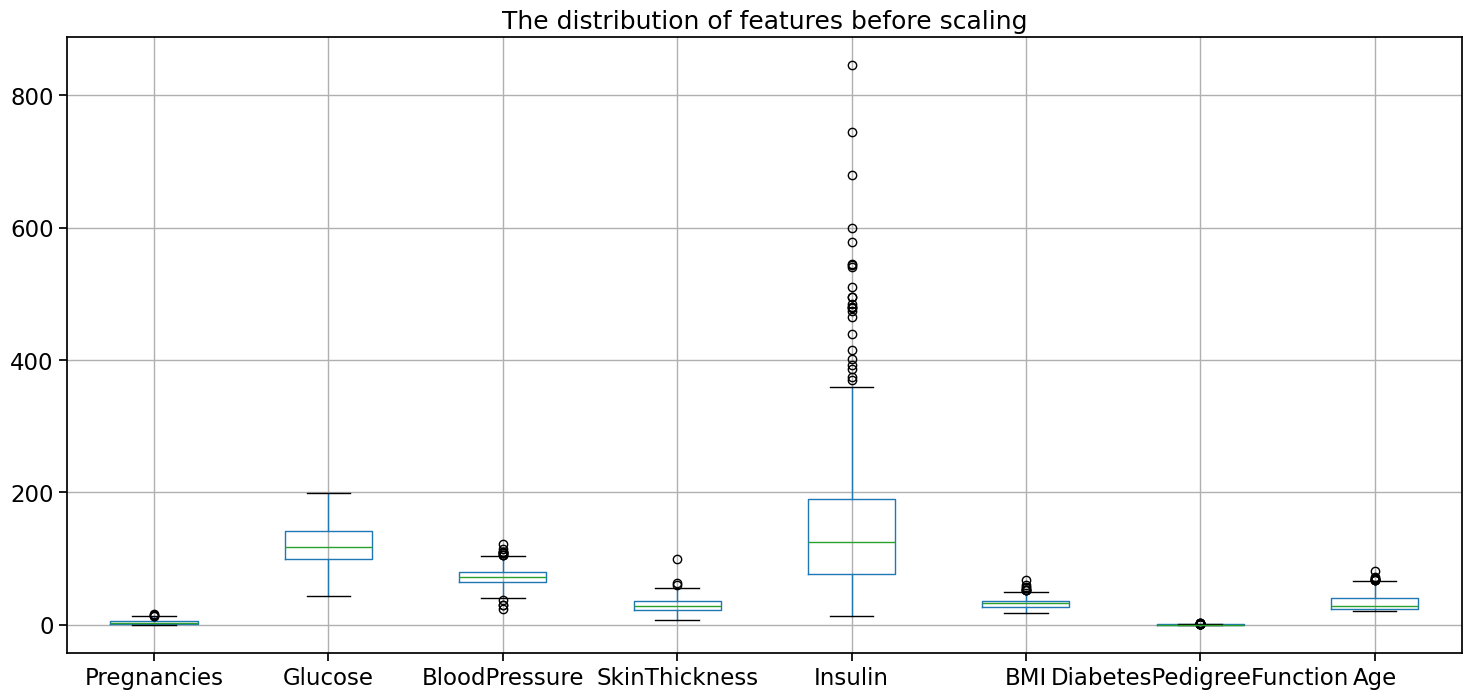

In [ ]:
plt.figure(figsize=[18,8])
with sns.plotting_context("notebook",font_scale=1.5):
  data.boxplot(column=data.columns.values.tolist()[:-1])
  plt.title("The distribution of features before scaling")

In [ ]:
data['Glucose'].fillna(data['Glucose'].mean(), inplace = True)
data['BloodPressure'].fillna(data['BloodPressure'].mean(), inplace = True)
data['SkinThickness'].fillna(data['SkinThickness'].median(), inplace = True)
data['Insulin'].fillna(data['Insulin'].median(), inplace = True)
data['BMI'].fillna(data['BMI'].median(), inplace = True)

# Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(data.drop(["Outcome"], axis =1),),columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [ ]:
y =data.Outcome

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 42, stratify=y)

# KNN Using  Hyper parameters tuning with GridsearchCV

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Function to train the KNN model with hyperparameter tuning
def train_model(X_train, y_train):
    model = KNeighborsClassifier()
    param_grid = {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    print("Best Parameters:", grid_search.best_params_)
    print("Best Accuracy:", grid_search.best_score_)
    return best_model

In [ ]:
model = train_model(X_train, y_train)

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Best Accuracy: 0.7696744717304398


In [ ]:
test_y_pred = model.predict(X_test)

In [ ]:
cv_result = cross_validate(model,X_train, y_train, cv=5 ,scoring='accuracy',n_jobs=-1, return_train_score = True)
train_score = np.mean(cv_result['train_score'])
val_score = np.mean(cv_result['test_score'])



In [ ]:
true_negative, false_positive, false_negative, true_positive = confusion_matrix(y_test, test_y_pred).ravel()

# Model Performance

In [ ]:
print("Training Accuracy:", model.score(X_train, y_train))
print("CV Training Accuracy:", train_score)
print("Validation Score", val_score)
print("Testing Accuracy:", model.score(X_test, y_test))
print("Testing: Sensitivity:", true_positive/(true_positive+false_negative), "Specificity:", true_negative/(true_negative+false_positive))

Training Accuracy: 0.798828125
CV Training Accuracy: 0.8066575228099471
Validation Score 0.7696744717304398
Testing Accuracy: 0.74609375
Testing: Sensitivity: 0.5842696629213483 Specificity: 0.8323353293413174


# Validation Curve

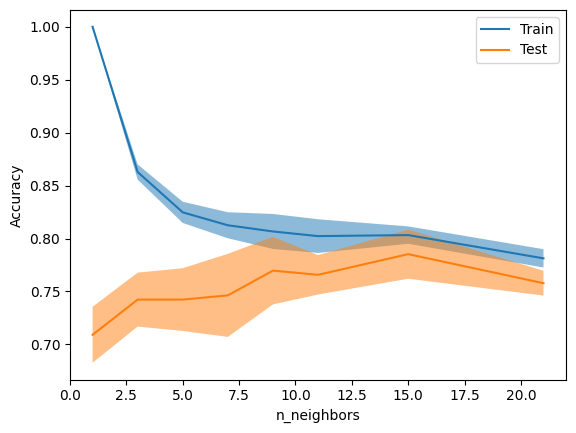

In [ ]:
from sklearn.model_selection import ValidationCurveDisplay
ValidationCurveDisplay.from_estimator(
    model,
    X_train,
    y_train,
    param_name="n_neighbors",
    param_range=[1, 3, 5, 7, 9, 11, 15, 21],
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

# Learning Curve

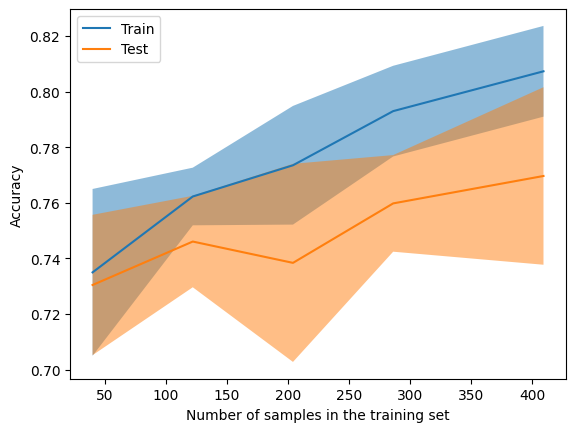

In [ ]:
from sklearn.model_selection import LearningCurveDisplay
LearningCurveDisplay.from_estimator(
    model,
    X_train, y_train,
    train_sizes=[0.1, 0.3, 0.5, 0.7, 1.0],
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

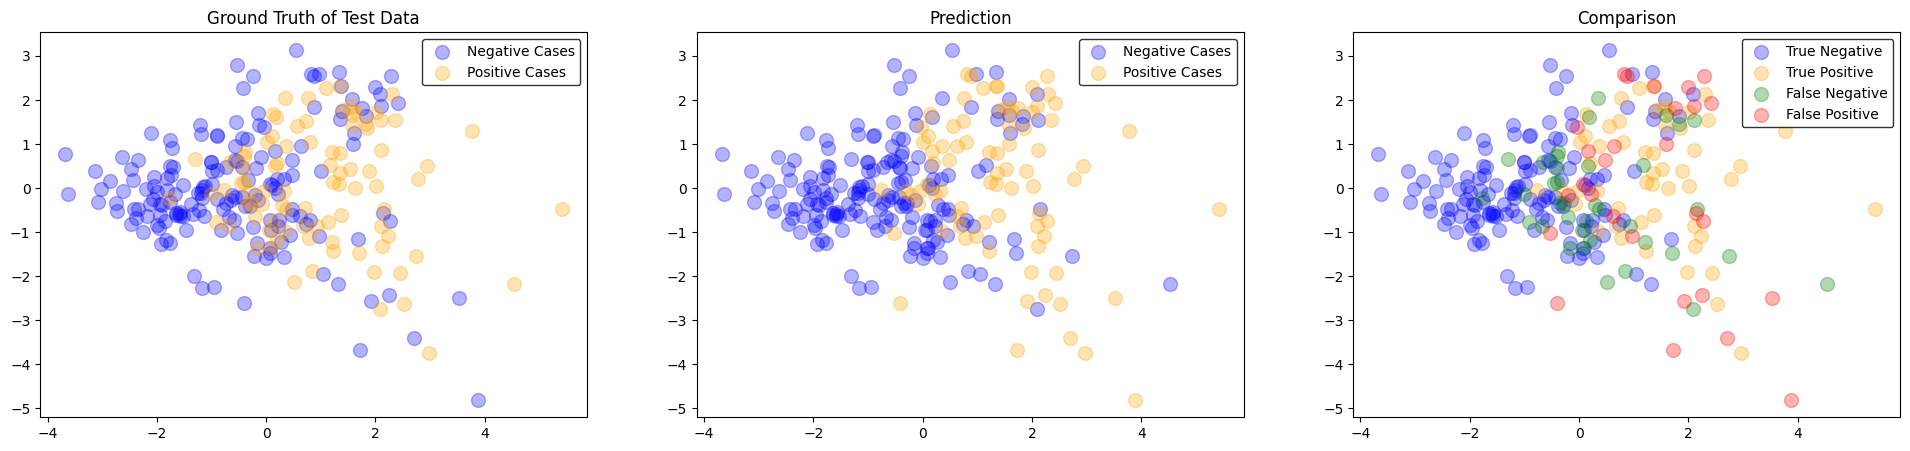

In [ ]:
pca_plot(X_test, y_test.to_numpy(), test_y_pred, 100, 1)


# ROC AUC

In [ ]:

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def plot_roc_auc(model, X_test, y_test, feature):
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = model.decision_function(X_test)
        y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min())

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)

    plt.plot(fpr, tpr, label=f'{feature} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Comparison')
    plt.legend()


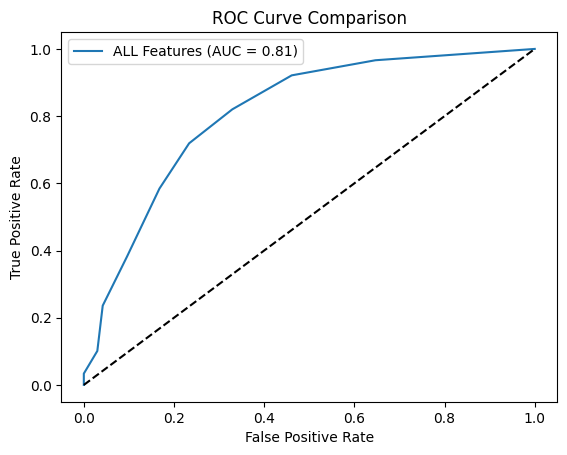

In [ ]:
plot_roc_auc(model, X_test, y_test, "ALL Features")


# Explainability Techniques

## Local Explanations
Local explanation methods help explain **individual predictions**.

- **LIME (Local Interpretable Model-agnostic Explanations):**
  - Generate a new  dataset from sample then fits a simple interpretable model (like linear regression) on the perturbed data.
  - It explains how each feature contributed to a specific prediction.

- **SHAP (SHapley Additive exPlanations):**
  - Based on Shapley values, It fairly distributes the prediction on all features.
  -It explains how much each feature increased or decreased a single prediction.

---

##  Global Explanations
Global methods help to  explain **overall model behavior**
- **LOFO (Leave One Feature Out)**
- **Global Surrogate Tree**


- **ICE (Individual Conditional Expectation):**
  -  It shows how the prediction for **each individual instance** changes as a feature value differs (data point itself) so heterogeneity problem in PDP is splved.

- **PDP (Partial Dependence Plot):**
  - It shows the average prediction of a feature, it helps in  understand the general effect of a feature on model output.

- **PFI (Permutation Feature Importance):**
  - It shows how much a model’s performance decreases when a feature’s values are randomly shuffled.




# LIME

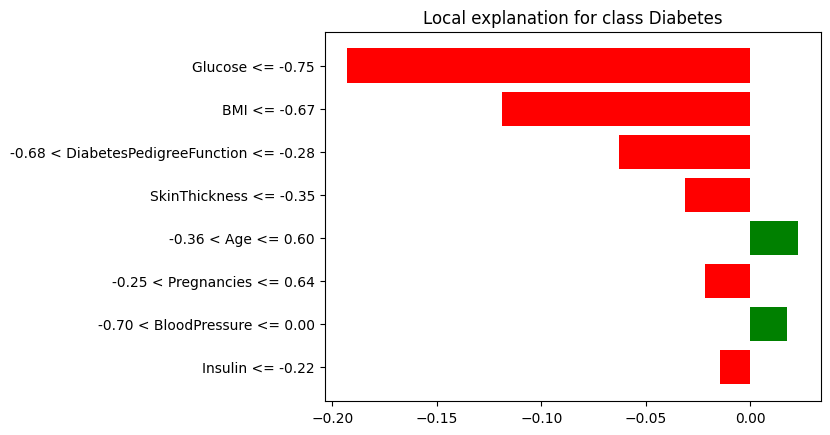

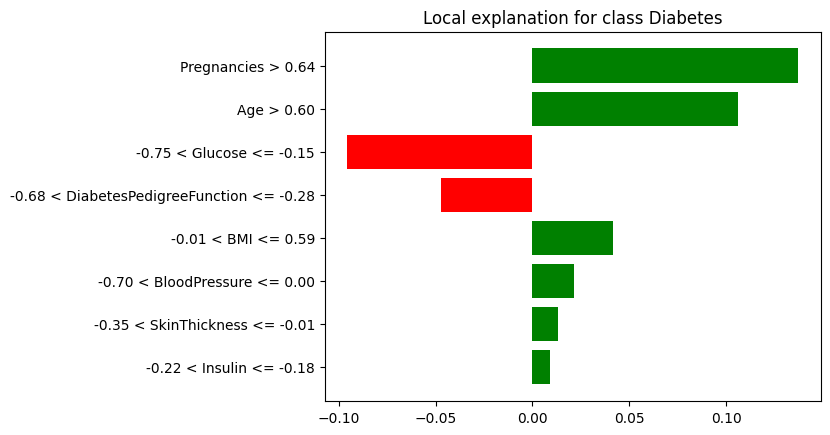

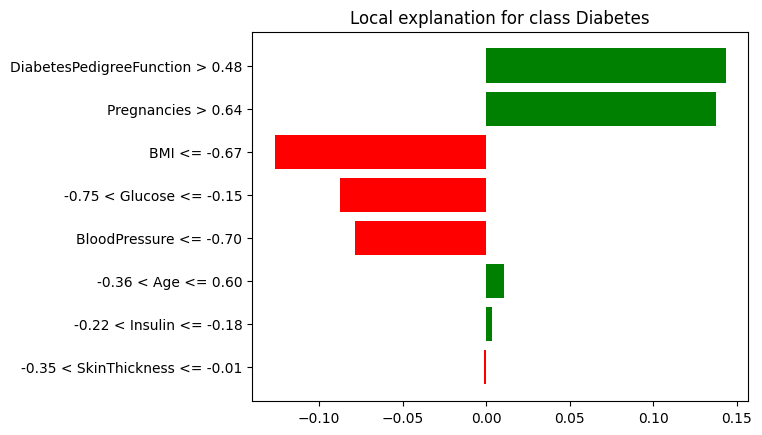

In [ ]:
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt

# Create the explainer
explainer_lime = LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X.columns,
    class_names=["No Diabetes", "Diabetes"],
    mode="classification"
)

# Explain predictions for 3 instances
for i in range(0, 3):
    explainer = explainer_lime.explain_instance(X_test.iloc[i].values, model.predict_proba, num_features=8)
    explainer.show_in_notebook(show_table=True, show_all=False)
    explainer.as_pyplot_figure()
    plt.show()


# SHAP

ExactExplainer explainer: 257it [07:03,  1.67s/it]


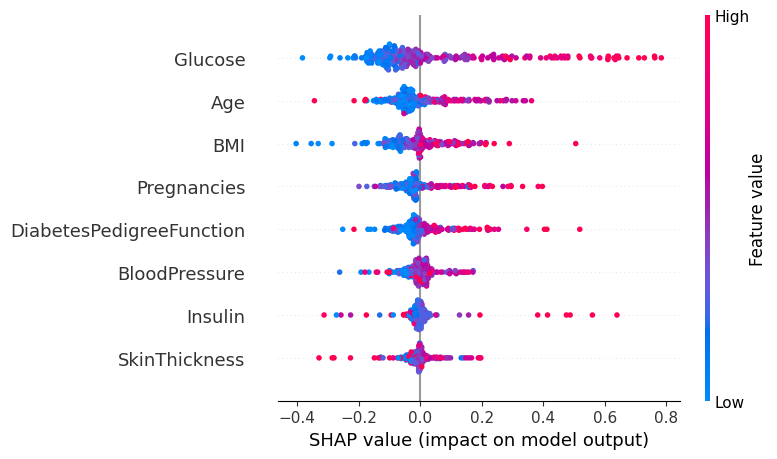

In [ ]:
shap_explainer = shap.Explainer(model.predict, X_train)
shap_values = shap_explainer(X_test)

# SHAP summary plot
shap.summary_plot(shap_values, X_test)

# Global Surrogate Tree

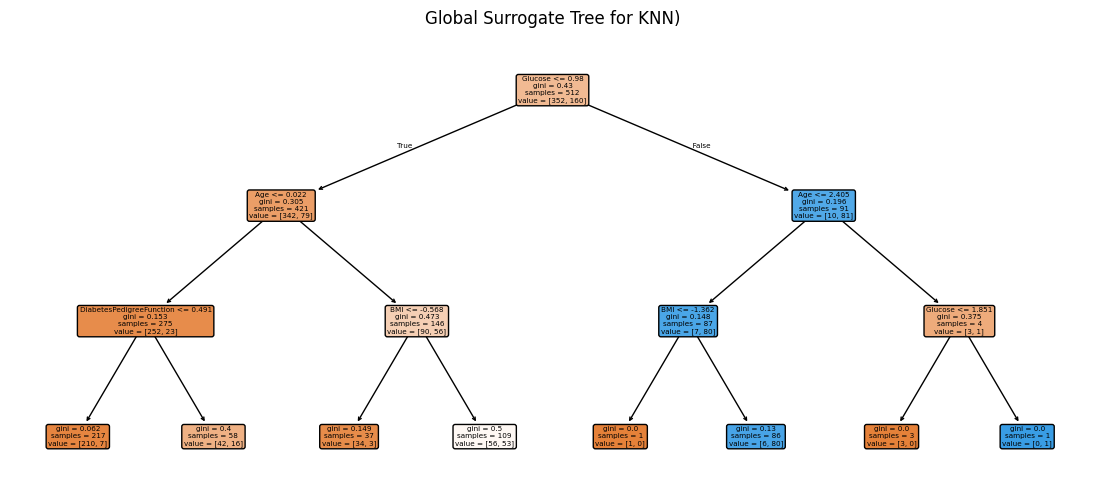

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
preds = model.predict(X_train)
surrogate = DecisionTreeClassifier(max_depth=3, random_state=42)
surrogate.fit(X_train, preds)

plt.figure(figsize=(14, 6))
tree.plot_tree(surrogate, feature_names=X_train.columns, filled=True, rounded=True)
plt.title(f"Global Surrogate Tree for KNN)")
plt.show()

# Permutation Feature Importance (Residuals Error)

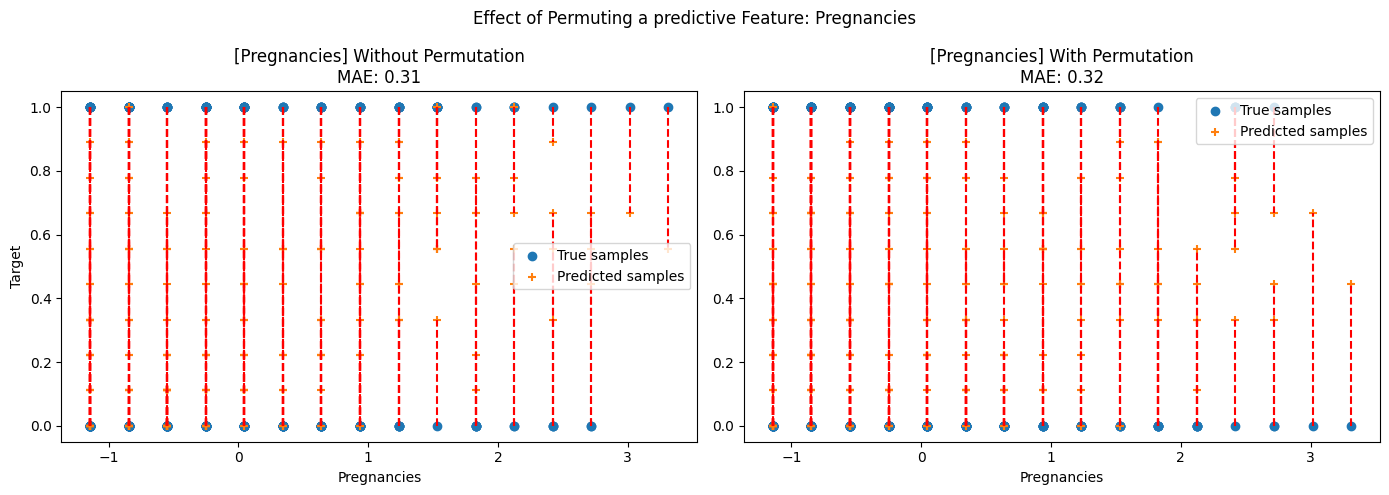

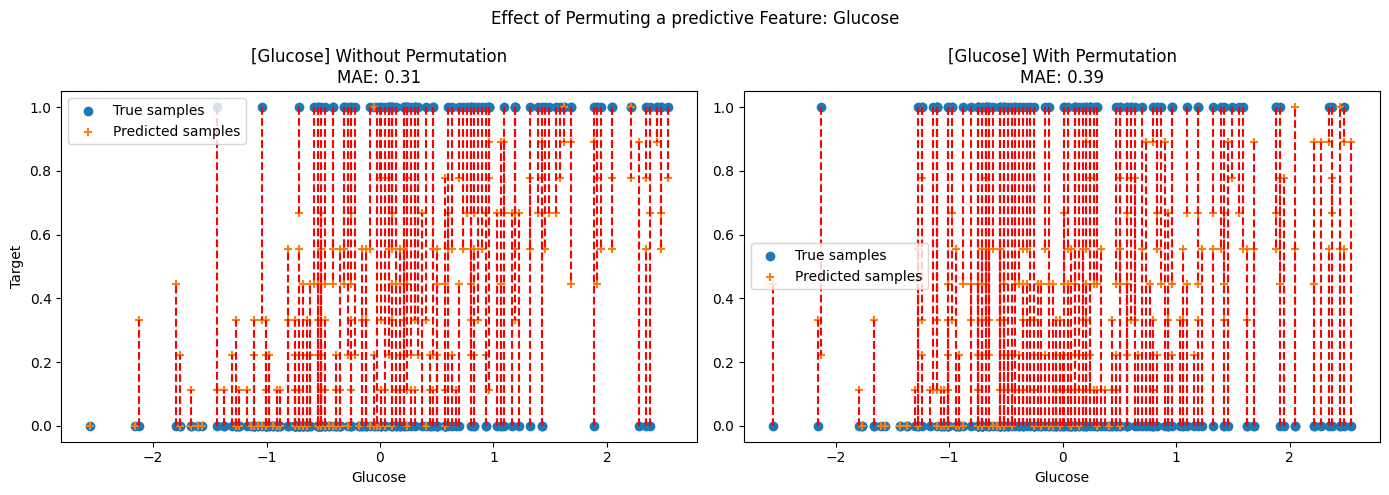

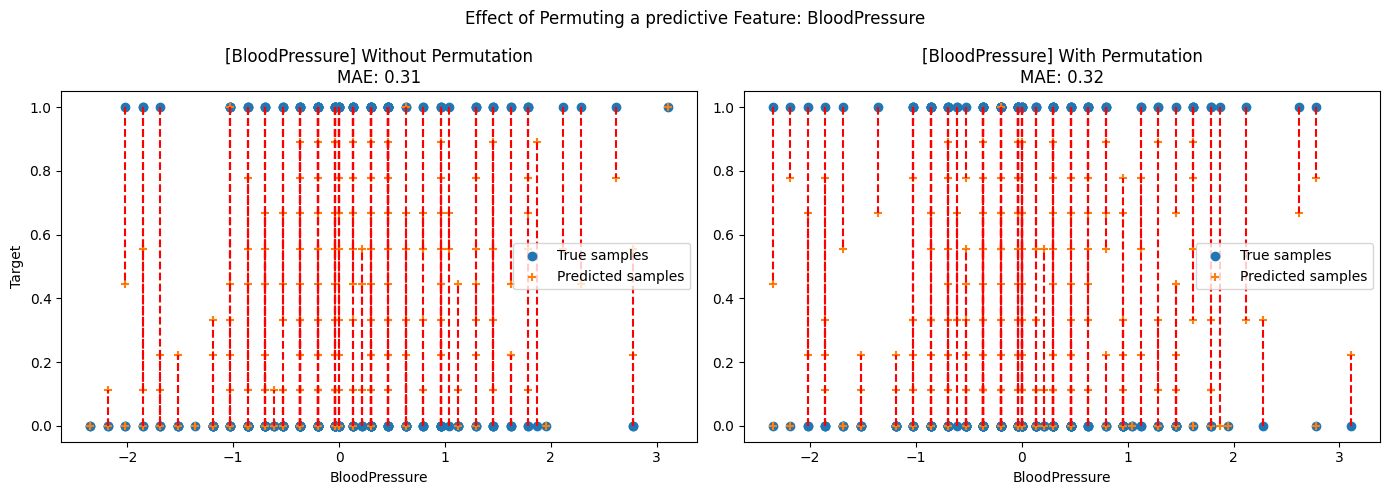

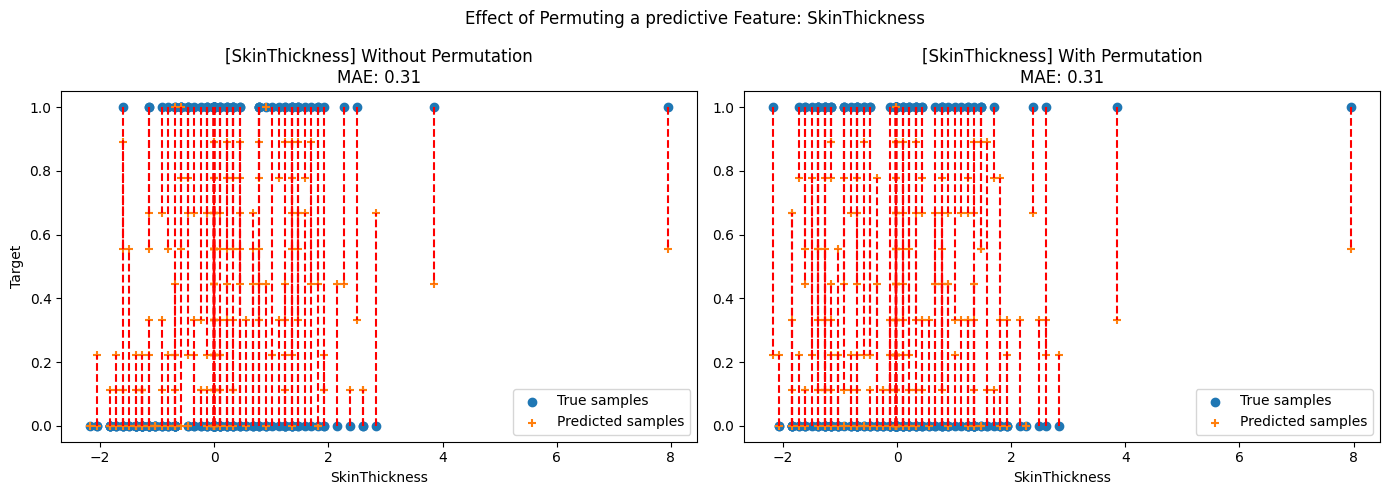

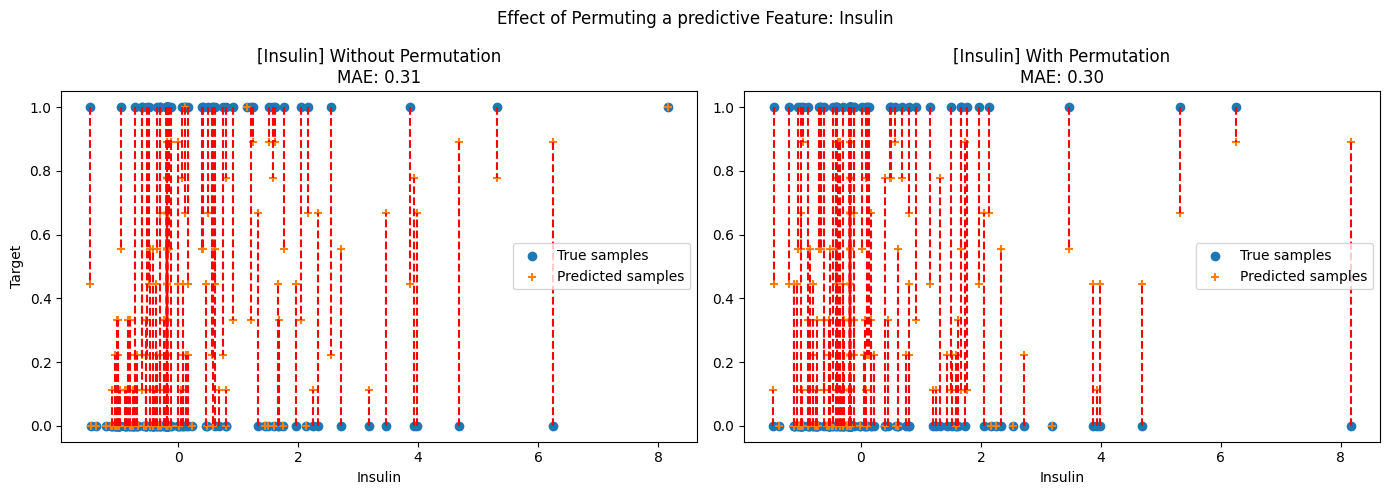

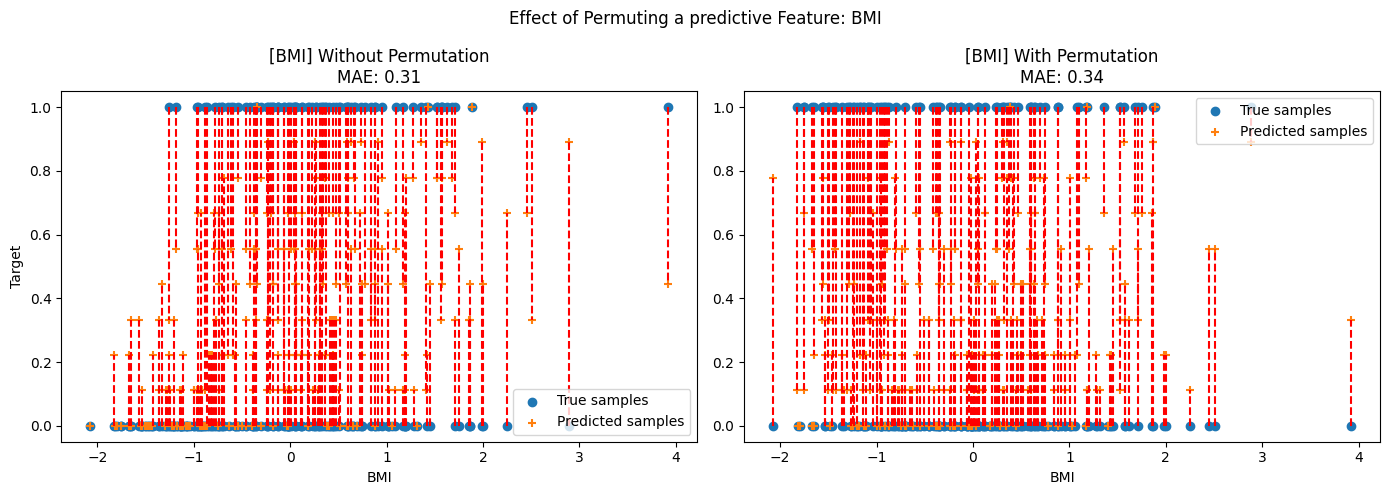

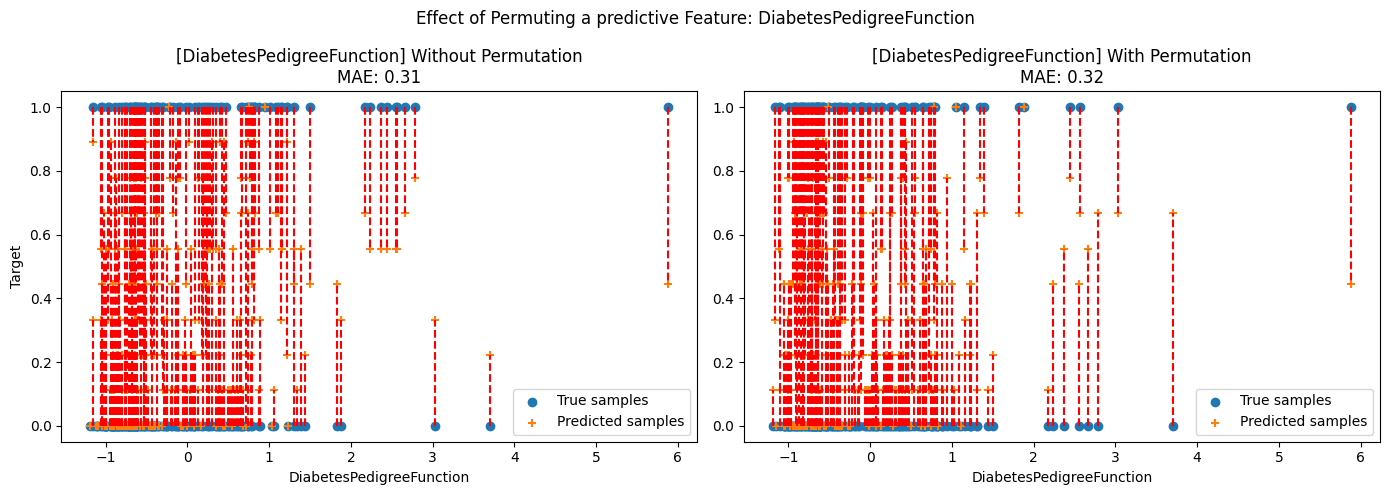

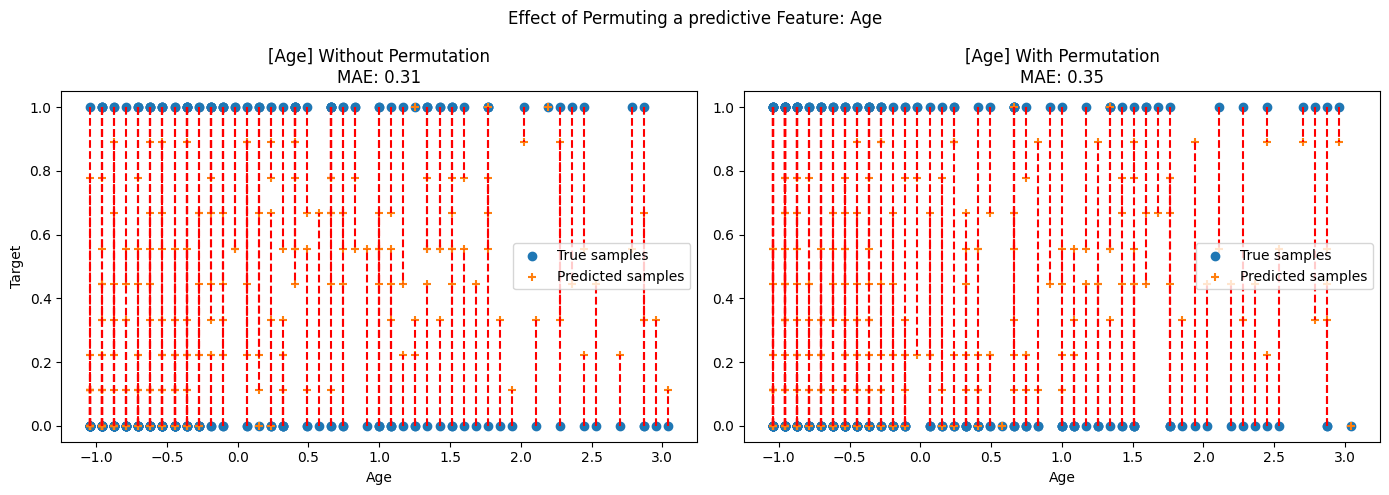

In [ ]:
# prediction on original data
y_pred = model.predict_proba(X_test)[:, 1]
mae = mean_absolute_error(y_test, y_pred)

# compare between before and after permutation
for i, feature_name in enumerate(X_test.columns):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))


    axes[0].scatter(X_test.iloc[:, i], y_test, label='True samples')
    axes[0].scatter(X_test.iloc[:, i], y_pred, label='Predicted samples', marker='+')
    for x, true, pred in zip(X_test.iloc[:, i], y_test, y_pred):
        axes[0].plot([x, x], [true, pred], 'r--')
    axes[0].set_title(f"[{feature_name}] Without Permutation\nMAE: {mae:.2f}")
    axes[0].set_xlabel(f"{feature_name}")
    axes[0].set_ylabel("Target")
    axes[0].legend()


    X_permuted = X_test.copy()
    X_permuted.iloc[:, i] = np.random.permutation(X_permuted.iloc[:, i])
    y_pred_permuted = model.predict_proba(X_permuted)[:, 1]
    permuted_mae = mean_absolute_error(y_test, y_pred_permuted)

    axes[1].scatter(X_permuted.iloc[:, i], y_test, label='True samples')
    axes[1].scatter(X_permuted.iloc[:, i], y_pred_permuted, label='Predicted samples', marker='+')
    for x, true, pred in zip(X_permuted.iloc[:, i], y_test, y_pred_permuted):
        axes[1].plot([x, x], [true, pred], 'r--')
    axes[1].set_title(f"[{feature_name}] With Permutation\nMAE: {permuted_mae:.2f}")
    axes[1].set_xlabel(f"{feature_name}")
    axes[1].legend()

    plt.suptitle(f"Effect of Permuting a predictive Feature: {feature_name}")
    plt.tight_layout()
    plt.show()


#  Sorting Feature Importance Using Permutation Feature Importance Using Accuracy

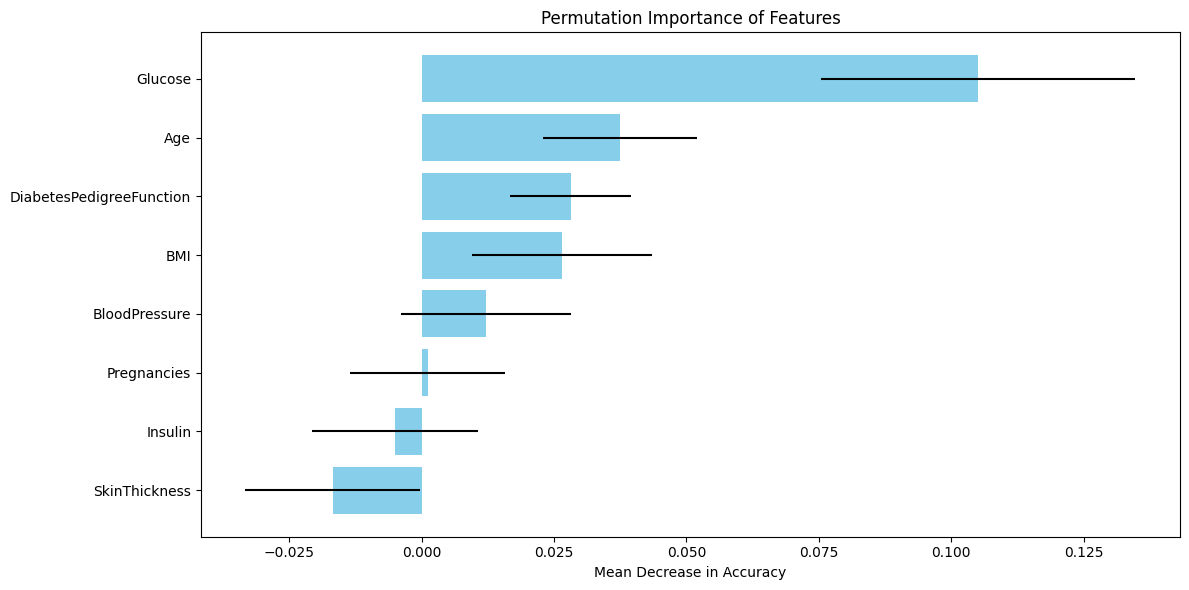

In [ ]:
# Calculate permutation importance using accuracy
from sklearn.inspection import permutation_importance

result = permutation_importance(
    model,
    X_test,
    y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=1,
    scoring='accuracy'
)

importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance_Mean': result.importances_mean,
    'Importance_STD': result.importances_std
}).sort_values(by='Importance_Mean', ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance_Mean'], xerr=importance_df['Importance_STD'], color='skyblue')
plt.xlabel('Mean Decrease in Accuracy')
plt.title('Permutation Importance of Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# LOFO

In [ ]:
from lofo.dataset import Dataset
from lofo.lofo_importance import LOFOImportance
from lofo import plot_importance
from sklearn.model_selection import KFold

def lofo_importance(model, df, target, features, scoring="accuracy"):
    cv = KFold(n_splits=5, shuffle=True, random_state=42)

    dataset = Dataset(
        df=df[df[target].notnull()],
        target=target,
        features=features
    )

    lofo_imp = LOFOImportance(
        dataset=dataset,
        model=model,
        scoring=scoring,
        cv=cv
    )

    return lofo_imp.get_importance()


  0%|          | 0/8 [00:00<?, ?it/s]

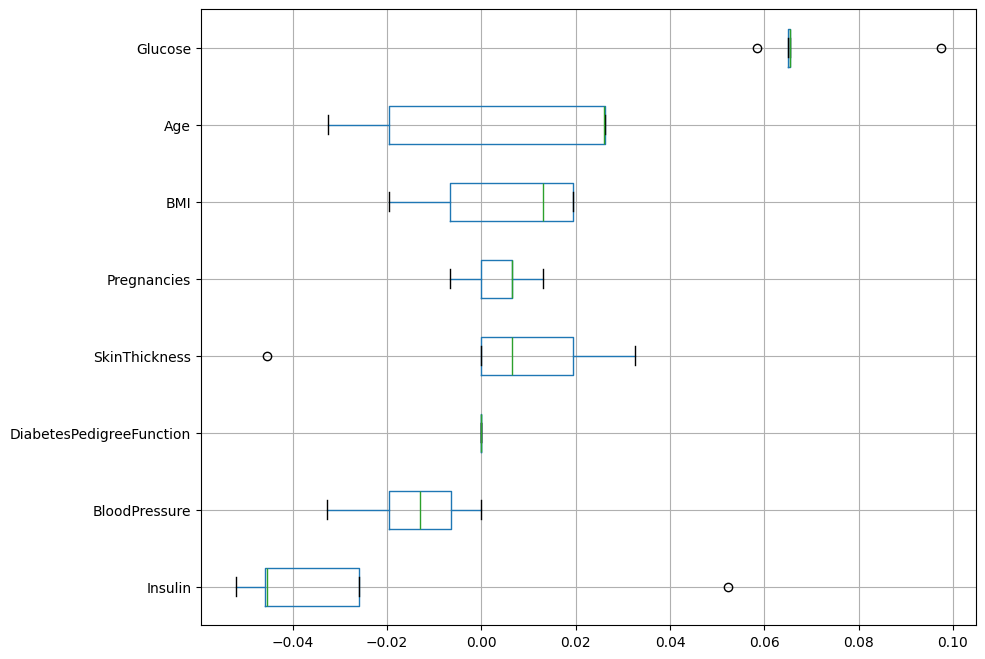

In [ ]:
lofo = lofo_importance(
    model=model,
    df=data,
    target="Outcome",
    features=X.columns.tolist(),
    scoring="accuracy"
)

plot_importance(lofo, figsize=(10, 8), kind="box")